In [43]:
import random
import matplotlib.pyplot as plt
import NN_resorces.Dataset as dt
from process_video import process_video
import sys
sys.argv = ['']

In [44]:
dataset = dt.Dataset('.\dataset')
len = dataset.__len__()
i = 0
pv = process_video()

model loaded


In [45]:
f1,f2,f3  = dataset.__getitem__(random.randint(0,len))
newFrame, flow1, flow2,f1w,f3w = pv.generateFrame(f1,f3)
flow1 = flow1.cpu().numpy()[0].transpose(1,2,0)*255
flow2 = flow2.cpu().numpy()[0].transpose(1,2,0)*255
newFrame = newFrame[:,:,::-1]
f1w = f1w[:,:,::-1]
f3w = f3w[:,:,::-1]
f1 = f1[:,:,::-1]
f3 = f3[:,:,::-1]

c:\Users\Mau\anaconda3\envs\proyecto-final\Lib\site-packages\torch\utils\checkpoint.py:31: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
c:\Users\Mau\anaconda3\envs\proyecto-final\Lib\site-packages\torchvision\transforms\functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


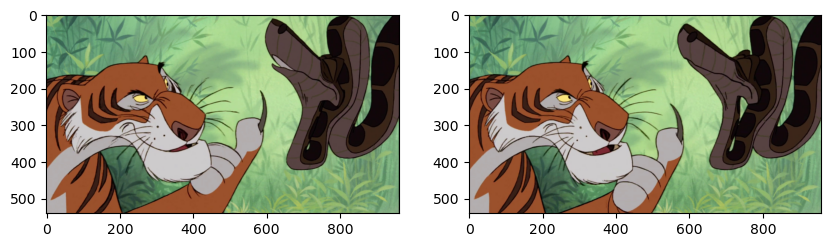

In [46]:
fig = plt.figure(figsize=(10, 7)) 
fig.add_subplot(1, 2, 1) 
imgplot1 = plt.imshow(f1)
fig.add_subplot(1, 2, 2)
imgplot2 = plt.imshow(f3)

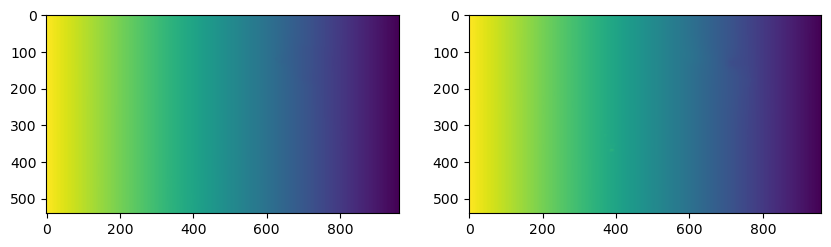

In [47]:
fig = plt.figure(figsize=(10, 7)) 
fig.add_subplot(1, 2, 1) 
imgplot1 = plt.imshow(flow1[:,:,0])
fig.add_subplot(1, 2, 2)
imgplot2 = plt.imshow(flow2[:,:,0])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


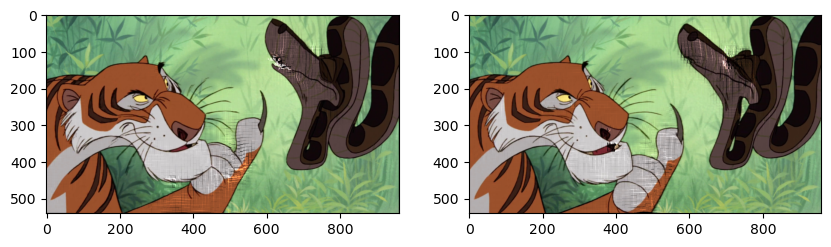

In [48]:
fig = plt.figure(figsize=(10, 7)) 
fig.add_subplot(1, 2, 1) 
imgplot1 = plt.imshow(f1w)
fig.add_subplot(1, 2, 2)
imgplot2 = plt.imshow(f3w)

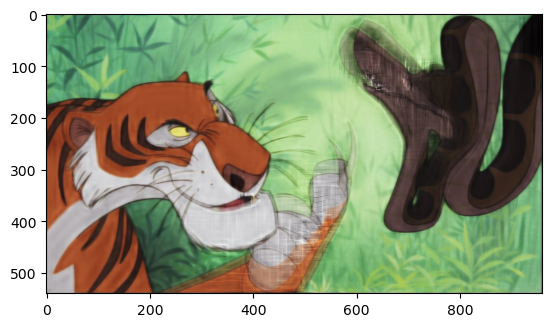

In [49]:
imgplot1 = plt.imshow(newFrame)